###**DATA  and library import and basic Preprocessing**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install stop_words

In [55]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet as wn
from stop_words import get_stop_words
from string import punctuation
import re, sys, math, string
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy import array
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Embedding
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D, Dropout,concatenate
from keras.layers.core import Reshape, Flatten
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import Model
from keras import regularizers
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier
from ast import literal_eval
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import itertools 
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
nltk.download('stopwords')
from keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings("ignore")
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.utils import to_categorical
import logging
from gensim.models import word2vec
import gensim
from sklearn.utils import shuffle
from sklearn.svm import LinearSVC

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
df = pd.read_csv("/content/drive/My Drive/Consumer Complaints/Consumer_Complaints.csv")

In [5]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/11/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,NAVY FEDERAL CREDIT UNION,MO,NaN,NaN,NaN,Web,07/11/2019,In progress,Yes,NaN,3303029
1,07/11/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"CCS Financial Services, Inc.",AR,71747,NaN,NaN,Web,07/11/2019,Closed with explanation,Yes,NaN,3303081
2,07/11/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,NaN,NaN,"Diversified Consultants, Inc.",GA,30083,NaN,NaN,Web,07/11/2019,In progress,Yes,NaN,3302734
3,07/11/2019,"Payday loan, title loan, or personal loan",Installment loan,Getting the loan,NaN,NaN,NaN,NAVY FEDERAL CREDIT UNION,VA,230XX,Servicemember,NaN,Web,07/11/2019,In progress,Yes,NaN,3303054
4,07/11/2019,Debt collection,Other debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,"EOS Holdings, Inc.",IN,NaN,NaN,NaN,Web,07/11/2019,Closed with explanation,Yes,NaN,3303406


In [6]:
df.shape

(1330434, 18)

In [0]:
data = df[["Product", "Consumer complaint narrative"]]

In [8]:
data.head()

,Product,Consumer complaint narrative
0,"Credit reporting, credit repair services, or o...",NaN
1,Debt collection,NaN
2,Debt collection,NaN
3,"Payday loan, title loan, or personal loan",NaN
4,Debt collection,NaN


In [9]:
data.shape

(1330434, 2)

In [0]:
data["Product"] = data["Product"].str.lower()

###**Preprocessing**

In [11]:
data.isnull().sum()

Product                              0
Consumer complaint narrative    935070
dtype: int64

In [12]:
data = data.dropna()
data.isnull().sum()

Product                         0
Consumer complaint narrative    0
dtype: int64

In [13]:
data.head()

,Product,Consumer complaint narrative
43374,debt collection,When they call they dont answer the call and t...
44383,"credit reporting, credit repair services, or o...",XXXX XXXX XXXX XXXX had posted 3 collection ac...
44469,checking or savings account,XXXX of the month every month since XX/XX/2019...
44562,debt collection,There are 2 charges on my credit report from a...
44659,debt collection,I provided account information which showed de...


In [14]:
data.shape

(395364, 2)

In [15]:
data["Product"].value_counts()

credit reporting, credit repair services, or other personal consumer reports    97387
debt collection                                                                 89119
mortgage                                                                        53993
credit reporting                                                                31588
credit card or prepaid card                                                     22684
student loan                                                                    22345
credit card                                                                     18838
bank account or service                                                         14885
checking or savings account                                                     13602
consumer loan                                                                    9474
vehicle loan or lease                                                            6045
money transfer, virtual currency, or money service    

In [0]:
data.reset_index(level=0, inplace=True)

In [0]:
data = data.drop(['index'],1)

In [18]:
data.head()

,Product,Consumer complaint narrative
0,debt collection,When they call they dont answer the call and t...
1,"credit reporting, credit repair services, or o...",XXXX XXXX XXXX XXXX had posted 3 collection ac...
2,checking or savings account,XXXX of the month every month since XX/XX/2019...
3,debt collection,There are 2 charges on my credit report from a...
4,debt collection,I provided account information which showed de...


In [0]:
data = data.replace(to_replace =["credit card", "prepaid card"],  
                            value ="credit card or prepaid card")
data = data.replace(to_replace ="credit reporting",
                            value ="credit reporting, credit repair services, or other personal consumer reports")
data = data.replace(to_replace ="virtual currency",
                            value ="money transfer, virtual currency, or money service")
data = data.replace(to_replace ="money transfers",
                            value ="money transfer, virtual currency, or money service")
data = data.replace(to_replace =["student loan", "consumer loan", "vehicle loan or lease", "payday loan, title loan, or personal loan", "payday loan"],  
                            value ="loans")
data = data.replace(to_replace ="checking or savings account",  
                            value ="bank account or service")

In [0]:
data = data[data.Product != 'money transfer, virtual currency, or money service']
data = data[data.Product != 'other financial service']

In [21]:
data["Product"].value_counts()

credit reporting, credit repair services, or other personal consumer reports    128975
debt collection                                                                  89119
mortgage                                                                         53993
loans                                                                            44285
credit card or prepaid card                                                      42972
bank account or service                                                          28487
Name: Product, dtype: int64

In [22]:
data.head()

,Product,Consumer complaint narrative
0,debt collection,When they call they dont answer the call and t...
1,"credit reporting, credit repair services, or o...",XXXX XXXX XXXX XXXX had posted 3 collection ac...
2,bank account or service,XXXX of the month every month since XX/XX/2019...
3,debt collection,There are 2 charges on my credit report from a...
4,debt collection,I provided account information which showed de...


In [0]:
stopwordlist = ['title', 'body', 'xxxx']
english_stopwords = get_stop_words(language='english')
english_stopwords += stopwordlist
english_stopwords = list(set(english_stopwords))+list(punctuation)

In [0]:
def get_wordnet_pos(word):
    if word.startswith('N'):
        return wn.NOUN
    elif word.startswith('V'):
        return wn.VERB
    elif word.startswith('J'):
        return wn.ADJ
    elif word.startswith('R'):
        return wn.ADV
    else:
        return wn.NOUN

In [0]:
def tfidf_preprocess(text):
    lemmatizer = nltk.WordNetLemmatizer().lemmatize
    text = re.sub('\W+', ' ', str(text))
    text = re.sub(r'[0-9]+', '', text.lower())
    word_pos = nltk.pos_tag(nltk.word_tokenize(text))
    normalized_text_lst = [lemmatizer(x[0], get_wordnet_pos(x[1])).lower() for x in word_pos]
    stop_words_free = [i for i in normalized_text_lst if i not in english_stopwords and len(i) > 3]
    stop_words_free = list(set(stop_words_free))
    return(stop_words_free)

In [0]:
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].apply(tfidf_preprocess)

In [0]:
data.to_csv("/content/drive/My Drive/Consumer Complaints/output_final_data.csv", index=False)

In [0]:
data = pd.read_csv('/content/drive/My Drive/Consumer Complaints/output_final_data.csv',converters={"Consumer complaint narrative": literal_eval})

In [27]:
data['Product'].unique()

array(['debt collection',
       'credit reporting, credit repair services, or other personal consumer reports',
       'bank account or service', 'mortgage',
       'credit card or prepaid card', 'loans'], dtype=object)

In [28]:
data.head()

,Product,Consumer complaint narrative
0,debt collection,"[credit, call, agency, associate, sign, commit..."
1,"credit reporting, credit repair services, or o...","[credit, call, agency, information, help, mult..."
2,bank account or service,"[send, time, call, account, numerous, draft, s..."
3,debt collection,"[credit, name, call, agency, experience, repor..."
4,debt collection,"[credit, send, account, bill, show, informatio..."


In [29]:
data.shape

(387831, 2)

In [0]:
data = data[data.astype(str)['Consumer complaint narrative'] != '[]']

In [31]:
data.shape

(387816, 2)

###T**FIDF Vectorizer**



In [0]:
data_tfidf = data.copy()

In [0]:
min_word_count = 10

In [0]:
le = LabelEncoder()
data_tfidf["Product"] = le.fit_transform(data_tfidf["Product"])


In [35]:
data_tfidf.head()

,Product,Consumer complaint narrative
0,3,"[credit, call, agency, associate, sign, commit..."
1,2,"[credit, call, agency, information, help, mult..."
2,0,"[send, time, call, account, numerous, draft, s..."
3,3,"[credit, name, call, agency, experience, repor..."
4,3,"[credit, send, account, bill, show, informatio..."


In [0]:
data_tfidf['Consumer complaint narrative'] = data_tfidf['Consumer complaint narrative'].apply(lambda x: ' '.join(x))


In [0]:
tfidf = TfidfVectorizer(max_features=1500, sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1',stop_words='english')

In [0]:
vector= tfidf.fit_transform(data_tfidf["Consumer complaint narrative"])

In [0]:
X = vector.toarray()

In [0]:
y = data_tfidf["Product"]

In [0]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=42)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

###**Multinomial NB**

In [0]:
def Model_MultinomialNB(X_train,y_train,X_test,y_test):
    mnb = MultinomialNB()
    mnb.fit(X_train,y_train)
    print("Test Accuracy for Multinomial NB:",mnb.score(X_test, y_test))
    
    #Confusion Matrix  
    y_pred=mnb.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure()
    target_names =['bank account or service', 'credit card or prepaid card', 'credit reporting, credit repair services, or other personal consumer reports','debt collection','Loans','mortgage']
    plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')
    plt.show()

    #Classification report
    print(classification_report(y_test,y_pred, target_names=target_names))

###**Support vector Machine**

In [0]:
def Model_SVC(X_train,y_train,X_test,y_test):
    svc_model = LinearSVC()
    svc_model.fit(X_train,y_train)
    print("Test Accuracy for Support Vector Machine:",svc_model.score(X_test, y_test))
    
    #Confusion Matrix  
    y_pred=svc_model.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure()
    target_names =['bank account or service', 'credit card or prepaid card', 'credit reporting, credit repair services, or other personal consumer reports','debt collection','Loans','mortgage']
    plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')
    plt.show()

    #Classification report
    print(classification_report(y_test,y_pred, target_names=target_names))

###**Random Forest**

In [0]:
def Model_RandomForest(X_train,y_train,X_test,y_test):
    rf = RandomForestClassifier(n_estimators = 100, max_features='sqrt', verbose=1,random_state=42,n_jobs =-1)
    rf.fit(X_train,y_train)
    print("Test Accuracy for Random Forest:",rf.score(X_test, y_test))
    
    #Confusion Matrix  
    y_pred=rf.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure()
    target_names =['bank account or service', 'credit card or prepaid card', 'credit reporting, credit repair services, or other personal consumer reports','debt collection','Loans','mortgage']
    plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')
    plt.show()

    #Classification report
    print(classification_report(y_test,y_pred, target_names=target_names))

###**Random Forest, Multinomial NB and support vector machine with TFIDF**

Test Accuracy for Multinomial NB: 0.7787270617559844
Confusion matrix, without normalization


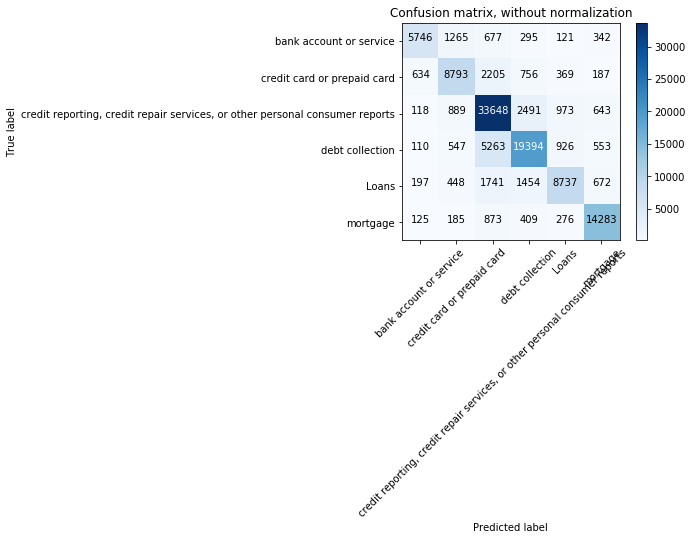

                                                                              precision    recall  f1-score   support

                                                     bank account or service       0.83      0.68      0.75      8446
                                                 credit card or prepaid card       0.73      0.68      0.70     12944
credit reporting, credit repair services, or other personal consumer reports       0.76      0.87      0.81     38762
                                                             debt collection       0.78      0.72      0.75     26793
                                                                       Loans       0.77      0.66      0.71     13249
                                                                    mortgage       0.86      0.88      0.87     16151

                                                                    accuracy                           0.78    116345
                                                      

In [46]:
Model_MultinomialNB(X_train,y_train,X_test,y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.5s finished


Test Accuracy for Random Forest: 0.8484507284369762


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.6s finished


Confusion matrix, without normalization


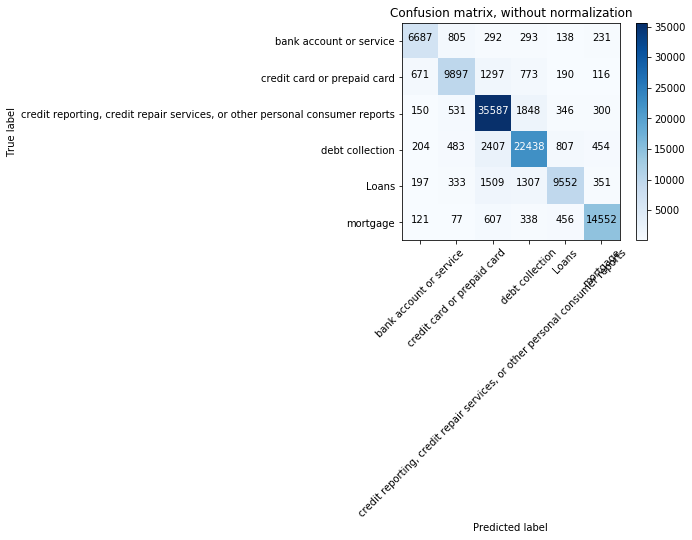

                                                                              precision    recall  f1-score   support

                                                     bank account or service       0.83      0.79      0.81      8446
                                                 credit card or prepaid card       0.82      0.76      0.79     12944
credit reporting, credit repair services, or other personal consumer reports       0.85      0.92      0.88     38762
                                                             debt collection       0.83      0.84      0.83     26793
                                                                       Loans       0.83      0.72      0.77     13249
                                                                    mortgage       0.91      0.90      0.91     16151

                                                                    accuracy                           0.85    116345
                                                      

In [47]:
Model_RandomForest(X_train,y_train,X_test,y_test)

Test Accuracy for Support Vector Machine: 0.829532854871288
Confusion matrix, without normalization


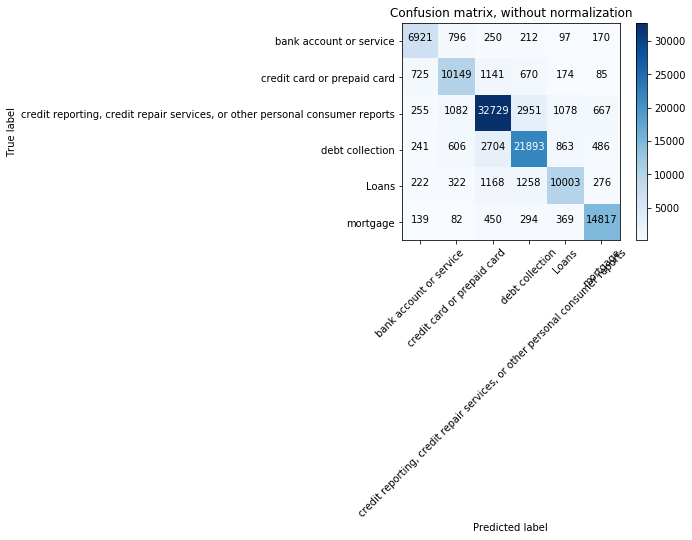

                                                                              precision    recall  f1-score   support

                                                     bank account or service       0.81      0.82      0.82      8446
                                                 credit card or prepaid card       0.78      0.78      0.78     12944
credit reporting, credit repair services, or other personal consumer reports       0.85      0.84      0.85     38762
                                                             debt collection       0.80      0.82      0.81     26793
                                                                       Loans       0.79      0.76      0.77     13249
                                                                    mortgage       0.90      0.92      0.91     16151

                                                                    accuracy                           0.83    116345
                                                      

In [48]:
Model_SVC(X_train,y_train,X_test,y_test)

###**Word2Vec**

In [0]:
def get_average_word2vec(complaints_lst, model, num_features=300):
    index2word_set = set(model.wv.index2word)
    vectorized_lst = []
    vectorized_lst = [model[word] if word in index2word_set else np.zeros(num_features) for word in \
                      complaints_lst]    
    nwords = len(vectorized_lst)
    summed = np.sum(vectorized_lst, axis=0)
    averaged_vector = np.divide(summed, nwords)
    return averaged_vector

In [0]:
data_word2vec = data.copy()
vocabulary_of_all_words = data_word2vec['Consumer complaint narrative'].tolist()
num_features = 300
min_word_count = 10                      
num_workers = 8
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsampling for frequent words
word2vec_model_name = "/content/drive/My Drive/Consumer Complaints/300features_10minwords_10context"
word2vec_complaints = word2vec.Word2Vec(vocabulary_of_all_words, workers=num_workers, size=num_features, 
                                   min_count=min_word_count, window=context, sample=downsampling)
word2vec_complaints.save(word2vec_model_name)

In [0]:
word2vec_complaints = gensim.models.Word2Vec.load(word2vec_model_name)

In [0]:
vocab_lst_flat = [item for sublist in vocabulary_of_all_words for item in sublist]
vocab_lst_flat = list(set(vocab_lst_flat))

In [53]:
try:
    word2vec_complaints.wv.most_similar("good")
except KeyError:
    print("Sorry, this word doesn't exist in the vocabulary.")
    
words_not_present = 0
words_present = 0
total_unique_tokens = len(set(vocab_lst_flat))
missing_words = []
for i in vocab_lst_flat:
    try:
        p = word2vec_complaints[i]
        words_present+=1
    except KeyError:
        missing_words.append(i)
        words_not_present+=1
print(words_present, words_not_present, total_unique_tokens)

15217 81848 97065


In [54]:
print(missing_words[:20])

['nessee', 'repand', 'unpalatable', 'respondedxxxx', 'rport', 'lindsays', 'responbile', 'excersise', 'attach_', 'beendelinquent', 'meantim', 'havebenefitedby', 'withthese', 'emaile', 'venripro', 'modist', 'esclations', 'addemdum', 'subds', 'tips']


In [0]:
embeddings_df = data_word2vec['Consumer complaint narrative'].apply(lambda complaint: get_average_word2vec(complaint, word2vec_complaints, num_features)).to_frame()

In [63]:
embeddings_df.head()

,Consumer complaint narrative
0,"[0.9471367004772892, 0.7979679894836053, -0.03..."
1,"[0.346503, 0.30323634, -0.37221718, 0.39138225..."
2,"[0.6027165761595825, 0.21563738957047462, -0.1..."
3,"[-0.011071595, 0.24715567, -0.29448014, 0.4220..."
4,"[-0.24729402370212483, -0.14960658084601164, 0..."


In [0]:
col_lst = []
for i in range(num_features):
    col_lst.append('vec_'+str(i+1))

In [0]:
exploded_em_df = pd.DataFrame(embeddings_df['Consumer complaint narrative'].tolist(), columns=col_lst)

In [0]:
exploded_em_df = pd.DataFrame(embeddings_df['Consumer complaint narrative'].apply(pd.Series))

In [69]:
exploded_em_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.947137,0.797968,-0.030936,0.325574,0.328264,-0.063959,0.518907,0.700780,-0.572147,0.180646,-0.427725,0.770378,0.280004,-0.345742,0.020460,-0.264205,0.038950,-0.050022,0.410842,-0.675329,0.839332,0.379119,0.249163,-0.267121,-0.023081,0.308620,-0.020102,0.517519,-0.439591,-0.659038,0.007898,-0.051288,0.104583,-0.068355,0.095594,0.130207,0.062047,0.668240,0.222255,0.130468,...,0.234688,0.178829,0.086462,0.698007,-0.017392,0.347788,0.580184,0.044341,0.084879,0.806401,0.395428,0.070018,0.288851,0.359422,-0.270810,0.660588,0.024996,0.407959,0.490566,0.483582,0.764715,1.104238,-0.018630,-0.247769,0.000147,-0.087496,0.443121,-0.089405,0.049366,0.119993,0.323945,0.122406,-0.459337,-0.572419,-0.413979,0.568873,0.094099,0.314565,-0.201394,0.087419
1,0.346503,0.303236,-0.372217,0.391382,-0.123689,-0.039082,-0.102721,0.365666,-0.556957,0.368793,0.287114,0.417746,0.011604,0.152695,0.070894,0.122569,-0.362668,0.044491,0.091689,0.454121,0.416568,-0.080236,0.040214,-0.606339,0.560654,0.188586,-0.053478,-0.095007,-0.288335,-0.208826,0.013382,-0.156881,0.496778,-0.194981,0.020649,-0.249600,-0.272199,0.187005,-0.019485,-0.106376,...,-0.380186,0.171340,-0.373499,-0.070659,0.118852,0.076156,-0.079647,0.262490,-0.248086,0.300778,-0.009919,0.060713,0.437010,-0.406985,0.113912,0.124306,-0.021735,-0.230696,-0.107437,0.313559,0.067504,-0.219613,0.088254,-0.165316,-0.090705,-0.153628,0.541471,-0.590237,-0.109182,-0.092239,0.246691,-0.269896,-0.175584,-0.242937,0.024578,-0.118269,0.168241,0.154061,0.188385,-0.128660
2,0.602717,0.215637,-0.105109,-0.707172,-0.356494,-0.710269,-0.274683,-0.233497,-0.690138,-0.109448,0.896195,-0.420591,-0.070513,-0.858397,0.624172,-0.012132,-0.127305,0.000148,-0.414510,-0.454483,-0.216804,-0.035734,0.001337,0.181097,-0.417232,-0.296178,0.450816,-0.217483,0.543007,0.007233,-0.244287,-0.066502,0.580377,-0.672694,0.175977,0.810094,-0.110482,-0.093188,-0.088899,-0.185283,...,-0.091762,-0.058140,-0.061445,-0.162784,0.370719,0.056052,-0.001998,0.504208,-0.146694,0.207545,0.002446,-0.859417,-0.734845,-0.395253,1.323548,-0.392671,0.461727,-0.341981,0.113693,0.264209,0.330444,-0.869633,0.266686,0.432221,0.334894,-0.123034,-0.230814,-0.275854,0.081249,-0.387489,-0.335095,-0.220893,0.271718,-0.003779,0.047781,-0.283992,-0.387599,-0.452403,0.439226,-0.443428
3,-0.011072,0.247156,-0.294480,0.422079,0.461657,-0.761447,-0.182339,-0.289284,-0.011988,-0.234579,-0.028099,0.454353,0.191391,-0.651990,0.173564,0.092529,-0.162201,-0.301764,-0.140684,0.044114,0.594246,0.866858,0.076634,0.159238,0.284943,-0.099537,0.220469,0.159950,-0.412073,0.112449,0.183896,0.167631,0.667116,-0.089042,-0.252672,-0.055643,-0.335217,-0.015922,-0.027850,-0.199045,...,-0.646473,-0.209117,-0.039706,0.750582,-0.005598,0.240829,0.405978,0.791416,0.017423,0.414557,0.159703,0.074826,0.105072,-0.064181,0.391706,0.019175,-0.357031,0.035378,0.349715,0.437108,0.129767,0.043607,0.275251,0.269874,0.088628,0.053891,0.917821,-0.117185,-0.125556,-0.501329,0.239641,-0.099641,0.067811,-0.514687,0.213957,-0.065786,0.085711,-0.444779,0.069761,-0.258714
4,-0.247294,-0.149607,0.130453,-0.392330,0.717327,-1.027135,0.223010,-0.426988,-0.053654,0.412065,-0.582589,0.129513,1.559195,0.275356,-0.638029,-0.077253,-0.330036,0.211394,0.565011,0.521756,-0.652897,0.031698,-0.409630,-1.219217,-0.153522,-0.591173,0.319787,-0.009525,-0.468154,0.263078,0.179815,0.853124,0.319952,0.071037,-0.200335,-0.178070,0.091401,0.150515,-0.586330,-0.049739,...,0.286156,0.363583,-0.761480,0.091617,0.227966,0.356148,-0.165831,-1.199267,-0.400130,-0.606187,-0.317403,0.618639,-0.164691,0.414203,-0.289902,0.178247,0.157726,1.006584,0.431006,0.950790,-0.784731,-0.239662,0.372162,0.421877,-0.143780,0.723457,-0.127699,0.056994,0.130234,-0.053594,0

In [0]:
exploded_em_df.to_csv("/content/drive/My Drive/Consumer Complaints/vocab_trained_word2Vec.csv", index=False)

In [56]:
exploded_em_df = pd.read_csv('/content/drive/My Drive/Consumer Complaints/vocab_trained_word2Vec.csv')
print("Word2Vec output:\n")
exploded_em_df.head()

Word2Vec output:



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.947137,0.797968,-0.030936,0.325574,0.328264,-0.063959,0.518907,0.700780,-0.572147,0.180646,-0.427725,0.770378,0.280004,-0.345742,0.020460,-0.264205,0.038950,-0.050022,0.410842,-0.675329,0.839332,0.379119,0.249163,-0.267121,-0.023081,0.308620,-0.020102,0.517519,-0.439591,-0.659038,0.007898,-0.051288,0.104583,-0.068355,0.095594,0.130207,0.062047,0.668240,0.222255,0.130468,...,0.234688,0.178829,0.086462,0.698007,-0.017392,0.347788,0.580184,0.044341,0.084879,0.806401,0.395428,0.070018,0.288851,0.359422,-0.270810,0.660588,0.024996,0.407959,0.490566,0.483582,0.764715,1.104238,-0.018630,-0.247769,0.000147,-0.087496,0.443121,-0.089405,0.049366,0.119993,0.323945,0.122406,-0.459337,-0.572419,-0.413979,0.568873,0.094099,0.314565,-0.201394,0.087419
1,0.346503,0.303236,-0.372217,0.391382,-0.123689,-0.039082,-0.102721,0.365666,-0.556957,0.368793,0.287114,0.417746,0.011604,0.152695,0.070894,0.122569,-0.362668,0.044491,0.091689,0.454121,0.416568,-0.080236,0.040214,-0.606339,0.560654,0.188586,-0.053478,-0.095007,-0.288335,-0.208826,0.013382,-0.156881,0.496778,-0.194981,0.020649,-0.249600,-0.272199,0.187005,-0.019485,-0.106376,...,-0.380186,0.171340,-0.373499,-0.070659,0.118852,0.076156,-0.079647,0.262490,-0.248086,0.300778,-0.009919,0.060713,0.437010,-0.406985,0.113912,0.124306,-0.021735,-0.230696,-0.107437,0.313559,0.067504,-0.219613,0.088254,-0.165316,-0.090705,-0.153628,0.541471,-0.590237,-0.109182,-0.092239,0.246691,-0.269896,-0.175584,-0.242937,0.024578,-0.118269,0.168241,0.154061,0.188385,-0.128660
2,0.602717,0.215637,-0.105109,-0.707172,-0.356494,-0.710269,-0.274683,-0.233497,-0.690138,-0.109448,0.896195,-0.420591,-0.070513,-0.858397,0.624172,-0.012132,-0.127305,0.000148,-0.414510,-0.454483,-0.216804,-0.035734,0.001337,0.181097,-0.417232,-0.296178,0.450816,-0.217483,0.543007,0.007233,-0.244287,-0.066502,0.580377,-0.672694,0.175977,0.810094,-0.110482,-0.093188,-0.088899,-0.185283,...,-0.091762,-0.058140,-0.061445,-0.162784,0.370719,0.056052,-0.001998,0.504208,-0.146694,0.207545,0.002446,-0.859417,-0.734845,-0.395253,1.323548,-0.392671,0.461727,-0.341981,0.113693,0.264209,0.330444,-0.869633,0.266686,0.432221,0.334894,-0.123034,-0.230814,-0.275854,0.081249,-0.387489,-0.335095,-0.220893,0.271718,-0.003779,0.047781,-0.283992,-0.387599,-0.452403,0.439226,-0.443428
3,-0.011072,0.247156,-0.294480,0.422079,0.461657,-0.761447,-0.182339,-0.289284,-0.011988,-0.234579,-0.028099,0.454353,0.191391,-0.651990,0.173564,0.092529,-0.162201,-0.301764,-0.140684,0.044114,0.594246,0.866858,0.076634,0.159238,0.284943,-0.099537,0.220469,0.159950,-0.412073,0.112449,0.183896,0.167631,0.667116,-0.089042,-0.252672,-0.055643,-0.335217,-0.015922,-0.027850,-0.199045,...,-0.646473,-0.209117,-0.039706,0.750582,-0.005598,0.240829,0.405978,0.791416,0.017423,0.414557,0.159703,0.074826,0.105072,-0.064181,0.391706,0.019175,-0.357031,0.035378,0.349715,0.437108,0.129767,0.043607,0.275251,0.269874,0.088628,0.053891,0.917821,-0.117185,-0.125556,-0.501329,0.239641,-0.099641,0.067811,-0.514687,0.213957,-0.065786,0.085711,-0.444779,0.069761,-0.258714
4,-0.247294,-0.149607,0.130453,-0.392330,0.717327,-1.027135,0.223010,-0.426988,-0.053654,0.412065,-0.582589,0.129513,1.559195,0.275356,-0.638029,-0.077253,-0.330036,0.211394,0.565011,0.521756,-0.652897,0.031698,-0.409630,-1.219217,-0.153522,-0.591173,0.319787,-0.009525,-0.468154,0.263078,0.179815,0.853124,0.319952,0.071037,-0.200335,-0.178070,0.091401,0.150515,-0.586330,-0.049739,...,0.286156,0.363583,-0.761480,0.091617,0.227966,0.356148,-0.165831,-1.199267,-0.400130,-0.606187,-0.317403,0.618639,-0.164691,0.414203,-0.289902,0.178247,0.157726,1.006584,0.431006,0.950790,-0.784731,-0.239662,0.372162,0.421877,-0.143780,0.723457,-0.127699,0.056994,0.130234,-0.053594,0

In [57]:
data_word2vec = data_word2vec.reset_index(drop=True)
vectorized_df = pd.concat([exploded_em_df, data_word2vec[['Product']]], axis=1)                        
vectorized_df = shuffle(vectorized_df)

if vectorized_df[vectorized_df.isnull().any(axis=1)].empty:
    res = "True" # No NaNs exist in the cleaned dataset.
else:
    res = "False"
print(res)
print(vectorized_df.shape)
if not res:
    vectorized_df[vectorized_df.isnull().any(axis=1)]
    vectorized_df.dropna(axis=0, how='any')
    print(vectorized_df.shape)

True
(387816, 301)


In [0]:
vectorized_data = np.array(vectorized_df.drop('Product', axis=1))
vectorized_target = np.array(vectorized_df['Product'])

X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = tts(vectorized_data, vectorized_target,
                                                    test_size=0.3,
                                                    random_state=42)

###**Random Forest & Support Vector Machine ![alt text](https://)with Word2Vec**

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.0s finished


Test Accuracy for Random Forest: 0.7988740384202158


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.0s finished


Confusion matrix, without normalization


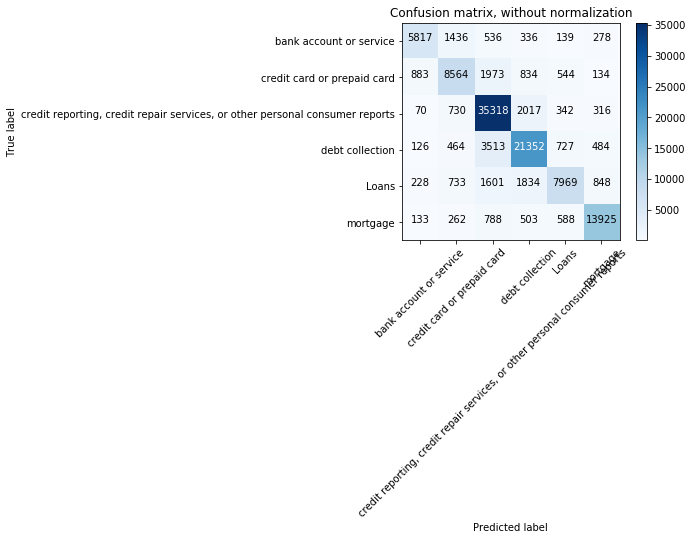

                                                                              precision    recall  f1-score   support

                                                     bank account or service       0.80      0.68      0.74      8542
                                                 credit card or prepaid card       0.70      0.66      0.68     12932
credit reporting, credit repair services, or other personal consumer reports       0.81      0.91      0.86     38793
                                                             debt collection       0.79      0.80      0.80     26666
                                                                       Loans       0.77      0.60      0.68     13213
                                                                    mortgage       0.87      0.86      0.87     16199

                                                                    accuracy                           0.80    116345
                                                      

In [60]:
Model_RandomForest(X_train_word2vec, y_train_word2vec, X_test_word2vec, y_test_word2vec)

In [0]:
Model_SVC(X_train_word2vec, y_train_word2vec, X_test_word2vec, y_test_word2vec)

###**Convolution Neural Network**

In [0]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = tts(data_tfidf["Consumer complaint narrative"], data_tfidf["Product"], test_size=0.3,random_state=42)

In [0]:
vectorizer = TfidfVectorizer(max_features=1500, sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1',stop_words='english')
X_train_onehot = vectorizer.fit_transform(X_train_nn)

In [0]:
word2idx = {word: idx for idx, word in enumerate(vectorizer.get_feature_names())}
tokenize = vectorizer.build_tokenizer()
preprocess = vectorizer.build_preprocessor()

In [0]:
def to_sequence(tokenizer, preprocessor, index, text):
    words = tokenizer(preprocessor(text))
    indexes = [index[word] for word in words if word in index]
    return indexes

In [0]:
X_train_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in X_train_nn]

In [48]:
MAX_SEQ_LENGHT = len(max(X_train_sequences, key=len))
print("MAX_SEQ_LENGHT=", MAX_SEQ_LENGHT)

MAX_SEQ_LENGHT= 500


In [0]:
N_FEATURES = len(vectorizer.get_feature_names())
X_train_sequences = pad_sequences(X_train_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)

In [0]:
X_test_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in X_test_nn]
X_test_sequences = pad_sequences(X_test_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)

In [0]:
y_train_nn1 = pd.get_dummies(y_train_nn)

In [0]:
early_stopping_monitor = EarlyStopping(patience=5)

In [56]:
model_CNN = Sequential()
model_CNN.add(Embedding(len(vectorizer.get_feature_names()) + 1,
                    64,
                    input_length=MAX_SEQ_LENGHT))
model_CNN.add(Conv1D(64, 5, activation='relu'))
model_CNN.add(MaxPooling1D(5))
model_CNN.add(Flatten())
model_CNN.add(Dense(units=64, activation='relu'))
model_CNN.add(Dense(units=6, activation='softmax'))
 
model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_CNN.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 64)           96064     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 496, 64)           20544     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 99, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6336)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                405568    
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
Total params: 522,566
Trainable params: 522,566
Non-trainable params: 0
________________________________________________

In [57]:
History = model_CNN.fit(X_train_sequences[:217176], y_train_nn1[:217176], 
          epochs=30, batch_size=512,
          validation_data=(X_train_sequences[217176:], y_train_nn1[217176:]),callbacks=[early_stopping_monitor], verbose=1)

Train on 217176 samples, validate on 54295 samples
Epoch 1/30
217176/217176 [==============================] - 13s 58us/step - loss: 0.7836 - acc: 0.7164 - val_loss: 0.5360 - val_acc: 0.8164
Epoch 2/30
217176/217176 [==============================] - 12s 56us/step - loss: 0.5100 - acc: 0.8249 - val_loss: 0.5025 - val_acc: 0.8268
Epoch 3/30
217176/217176 [==============================] - 12s 56us/step - loss: 0.4812 - acc: 0.8332 - val_loss: 0.4998 - val_acc: 0.8279
Epoch 4/30
217176/217176 [==============================] - 12s 56us/step - loss: 0.4599 - acc: 0.8396 - val_loss: 0.4900 - val_acc: 0.8304
Epoch 5/30
217176/217176 [==============================] - 12s 56us/step - loss: 0.4387 - acc: 0.8476 - val_loss: 0.4914 - val_acc: 0.8306
Epoch 6/30
217176/217176 [==============================] - 12s 56us/step - loss: 0.4167 - acc: 0.8555 - val_loss: 0.4886 - val_acc: 0.8322
Epoch 7/30
217176/217176 [==============================] - 12s 56us/step - loss: 0.3918 - acc: 0.8649 - val_

In [0]:
model_CNN.save("/content/drive/My Drive/Consumer Complaints/model_CNN.h5")

In [0]:
y_test_nn1 = pd.get_dummies(y_test_nn)

In [0]:
model_CNN_loaded = load_model('/content/drive/My Drive/Consumer Complaints/model_CNN.h5')

In [61]:
scores = model_CNN_loaded.evaluate(X_test_sequences, y_test_nn1, verbose=1)
print("CNN - Accuracy:", scores[1]) 

116345/116345 [==============================] - 8s 65us/step
CNN - Accuracy: 0.8187975417881675


Confusion matrix for CNN
Confusion matrix, without normalization


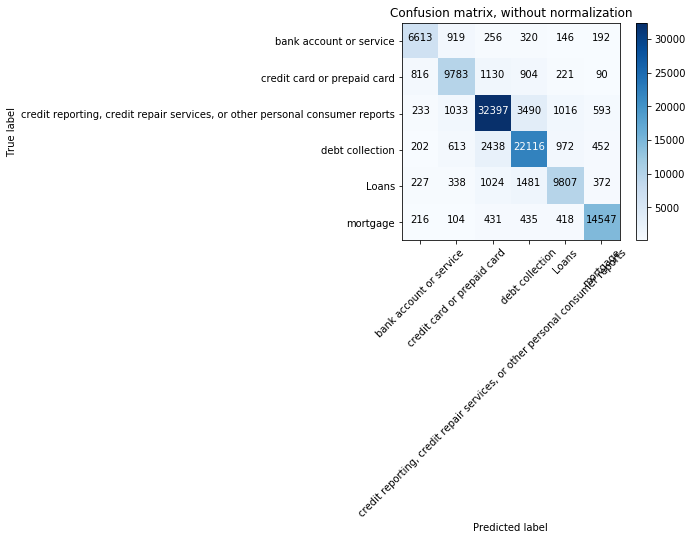

Classification Report for CNN
                                                                              precision    recall  f1-score   support

                                                     bank account or service       0.80      0.78      0.79      8446
                                                 credit card or prepaid card       0.76      0.76      0.76     12944
credit reporting, credit repair services, or other personal consumer reports       0.86      0.84      0.85     38762
                                                             debt collection       0.77      0.83      0.80     26793
                                                                       Loans       0.78      0.74      0.76     13249
                                                                    mortgage       0.90      0.90      0.90     16151

                                                                    accuracy                           0.82    116345
                        

In [62]:
print("Confusion matrix for CNN")
y_pred = model_CNN_loaded.predict_classes(X_test_sequences)
cnf_matrix = confusion_matrix(y_test_nn, y_pred)
np.set_printoptions(precision=2)
plt.figure()
target_names =['bank account or service', 'credit card or prepaid card', 'credit reporting, credit repair services, or other personal consumer reports','debt collection','Loans','mortgage']
plot_confusion_matrix(cnf_matrix, classes=target_names,
                  title='Confusion matrix, without normalization')
plt.show()

print("Classification Report for CNN")
print(classification_report(y_test_nn,y_pred, target_names=target_names))

###**LSTM**

In [63]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(len(vectorizer.get_feature_names()) + 1,
                    64,
                    input_length=MAX_SEQ_LENGHT))
model_LSTM.add(LSTM(64))
model_LSTM.add(Dense(units=6, activation='softmax'))
 
model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_LSTM.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 64)           96064     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 390       
Total params: 129,478
Trainable params: 129,478
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model_LSTM.fit(X_train_sequences[:217176], y_train_nn1[:217176], 
          epochs=30, batch_size=512,
          validation_data=(X_train_sequences[217176:], y_train_nn1[217176:]),callbacks=[early_stopping_monitor], verbose=1)

Train on 217176 samples, validate on 54295 samples
Epoch 1/30
 18432/217176 [=>............................] - ETA: 6:12 - loss: 1.6339 - acc: 0.3367

In [0]:
model_LSTM.save("/content/drive/My Drive/Consumer Complaints/model_LSTM.h5")

In [0]:
scores = model_LSTM.evaluate(X_test_sequences, y_test, verbose=1)
print("LSTM-Accuracy:", scores[1])

In [0]:
print("Confusion matrix for LSTM")
y_pred = model_CNN_loaded.predict_classes(X_test_sequences)
cnf_matrix = confusion_matrix(y_test_nn, y_pred)
np.set_printoptions(precision=2)
plt.figure()
target_names =['bank account or service', 'credit card or prepaid card', 'credit reporting, credit repair services, or other personal consumer reports','debt collection','Loans','mortgage']
plot_confusion_matrix(cnf_matrix, classes=target_names,
                  title='Confusion matrix, without normalization')
plt.show()

print("Classification Report for LSTM")
print(classification_report(y_test_nn,y_pred, target_names=target_names))